In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
directory = r'F:\Work\SOCAAutomation\Dataset\Images\09072024_1_1'
File = '2024_07_09_11_30_307.jpg'
img = cv.imread(directory + '/' + File)

In [59]:
def plot_hist(img):
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.hist(img[:,:,0].flatten(), bins=100)
    plt.subplot(1,3,2)
    plt.hist(img[:,:,1].flatten(), bins=100)
    plt.subplot(1,3,3)
    plt.hist(img[:,:,2].flatten(), bins=100)
    plt.show()

Text(0.5, 1.0, 'Original Image')

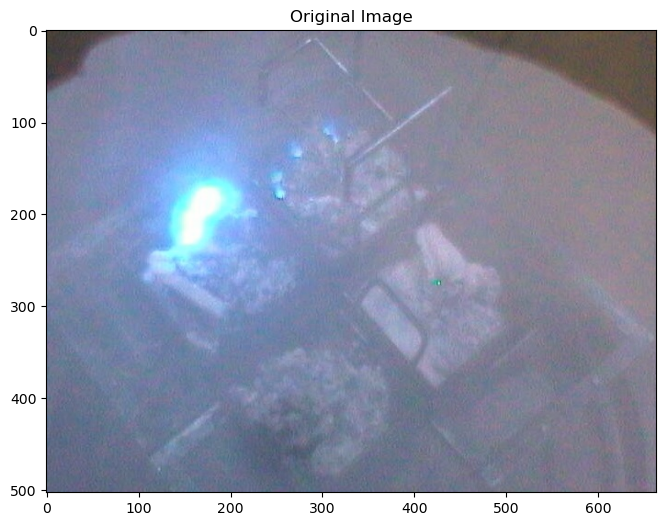

In [17]:
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.title('Original Image')

# RGB to HSV, Gray Scale

In [29]:
def plot_images(a, b, t1, t2):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.title(t1)
    plt.subplot(1,2,2)
    plt.imshow(b)
    plt.title(t2)

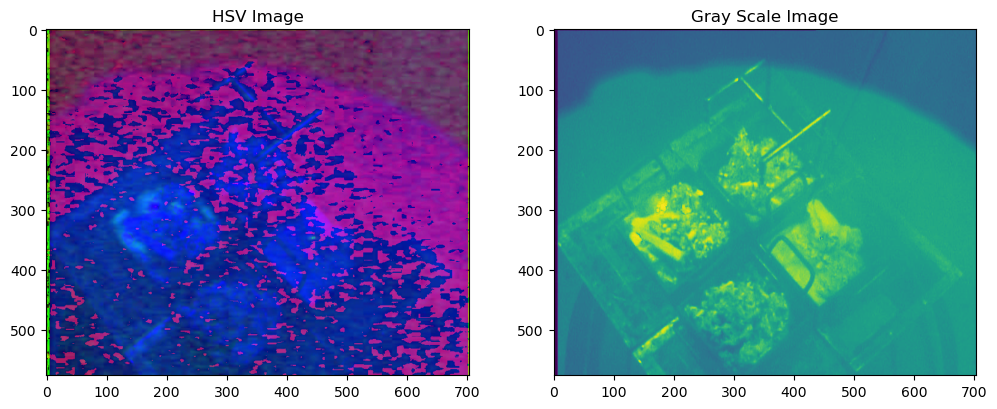

In [72]:
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plot_images(hsv_img, gray_img, 'HSV Image', 'Gray Scale Image')

## Histogram of gray scale

(array([5.0000e+00, 2.5000e+01, 8.5000e+01, 1.9500e+02, 3.1900e+02,
        4.2500e+02, 3.7600e+02, 2.7000e+02, 2.1000e+02, 2.1500e+02,
        3.6000e+02, 7.6500e+02, 1.4730e+03, 2.2670e+03, 2.4710e+03,
        1.8040e+03, 9.3000e+02, 4.0900e+02, 2.8300e+02, 2.3300e+02,
        2.3100e+02, 2.6500e+02, 3.8200e+02, 4.6000e+02, 6.4800e+02,
        9.4500e+02, 1.2150e+03, 1.7470e+03, 2.2160e+03, 2.8050e+03,
        3.5090e+03, 4.5320e+03, 5.5250e+03, 6.9000e+03, 8.1450e+03,
        9.1940e+03, 1.0221e+04, 1.0539e+04, 1.1010e+04, 1.2885e+04,
        1.5443e+04, 1.8259e+04, 2.0700e+04, 2.2285e+04, 2.1048e+04,
        1.6945e+04, 1.2486e+04, 9.7340e+03, 8.3770e+03, 7.4780e+03,
        6.4450e+03, 5.8610e+03, 5.4520e+03, 5.2200e+03, 4.7910e+03,
        4.3930e+03, 3.8960e+03, 3.4720e+03, 3.3080e+03, 3.0090e+03,
        2.7450e+03, 2.5470e+03, 2.0990e+03, 1.8070e+03, 1.5860e+03,
        1.3690e+03, 1.2380e+03, 1.1800e+03, 1.0390e+03, 9.8400e+02,
        8.8900e+02, 8.5600e+02, 8.4000e+02, 7.66

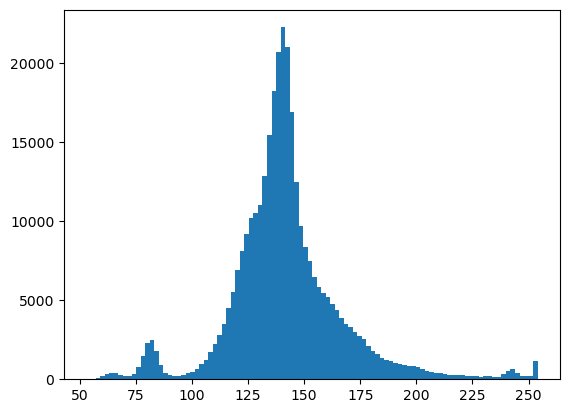

In [21]:
plt.hist(gray_img.flatten(), bins=100);

# Filters

## Median filter

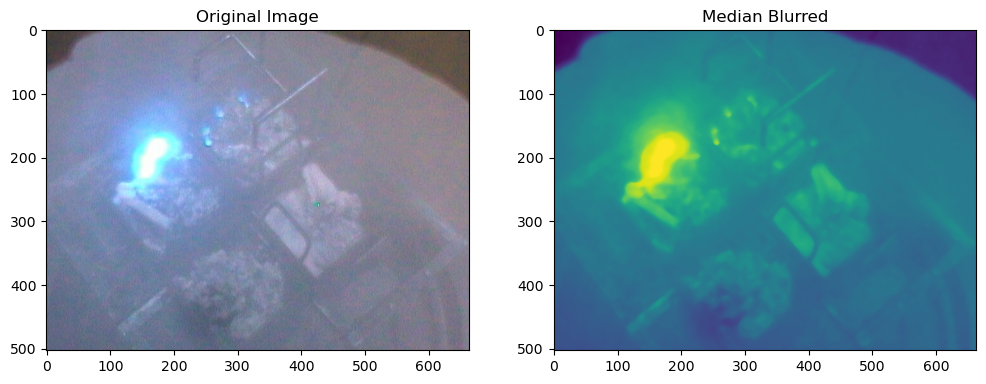

In [34]:
filter_size = 9
medf_img = cv.medianBlur(gray_img, filter_size)
plot_images(img, medf_img, 'Original Image', 'Median Blurred')

# Gaussian Filter

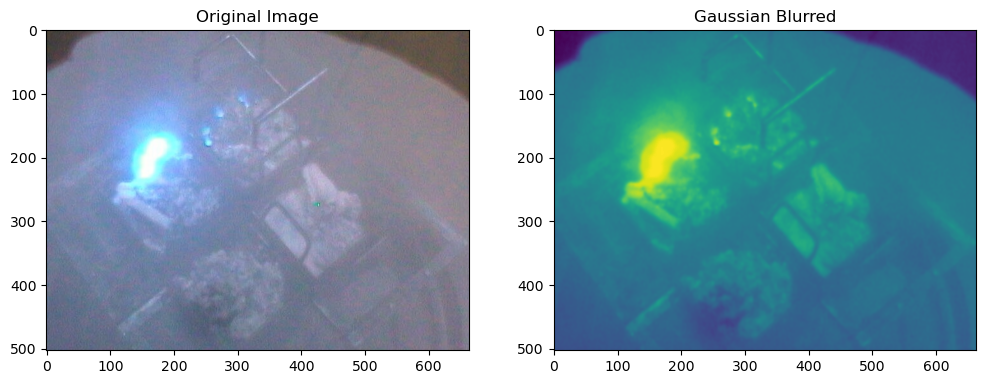

In [38]:
filter_size = 9
gaussf_img = cv.GaussianBlur(gray_img, (filter_size, filter_size), 0)
plot_images(img, gaussf_img, 'Original Image', 'Gaussian Blurred')

In [22]:
cv.imshow('Gray', gray_img)
cv.waitKey(0)

-1

# Edge Detection

## Sobel

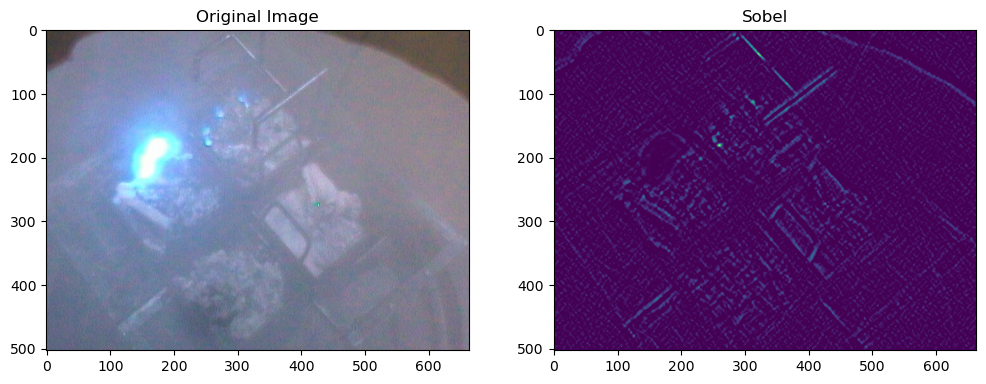

In [44]:
sobel_img = cv.Sobel(gaussf_img, cv.CV_8U,1,1,ksize=5)
plot_images(img, sobel_img, 'Original Image', 'Sobel')

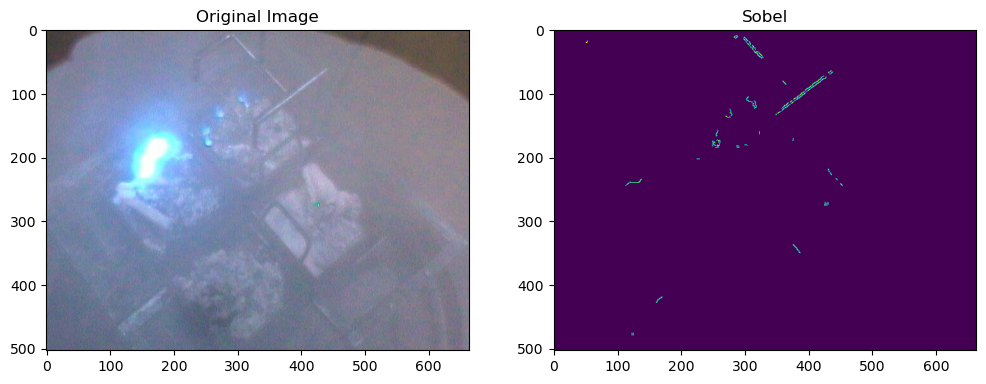

In [46]:
canny_img = cv.Canny(gray_img,100,150)
plot_images(img, canny_img, 'Original Image', 'Sobel')

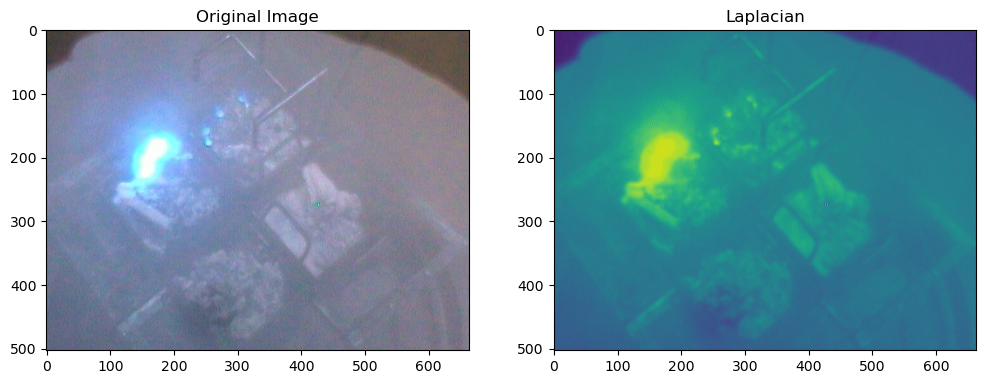

In [49]:
lap_img = cv.Laplacian(gray_img,cv.CV_64F)
plot_images(img, gray_img+lap_img, 'Original Image', 'Laplacian')

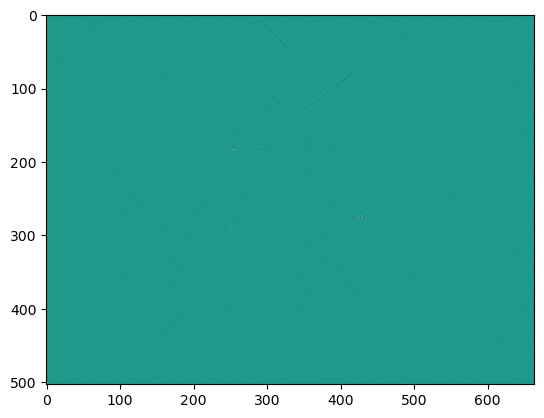

In [50]:
plt.imshow(lap_img)

# Histogram Equalization

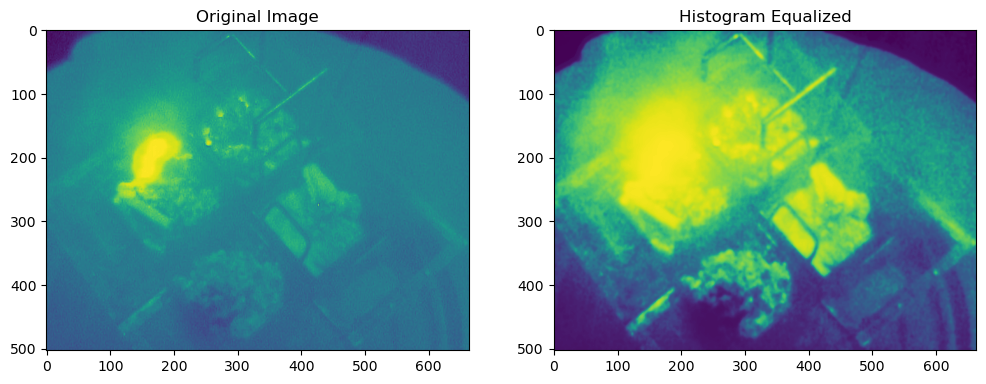

In [53]:
eqhist_img = cv.equalizeHist(gaussf_img)
plot_images(gray_img, eqhist_img, 'Original Image', 'Histogram Equalized')

In [54]:
cv.imshow('Gray', eqhist_img)
cv.waitKey(0)

-1

# Thresholding

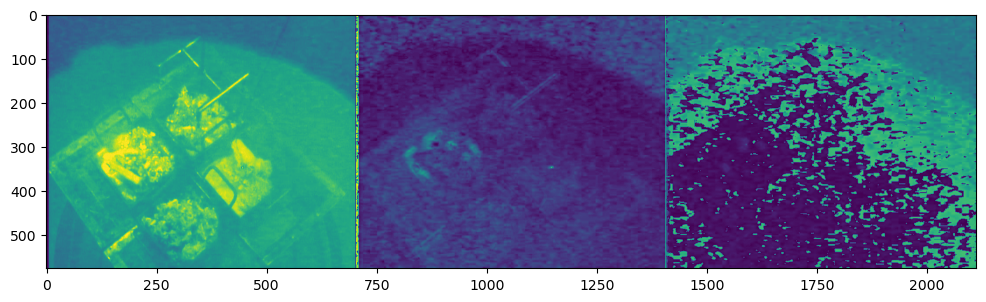

In [73]:
#split channels
plt.figure(figsize=(12,6))
split_img = np.hstack([hsv_img[:,:,2], hsv_img[:,:,1], hsv_img[:,:,0]])
plt.imshow(split_img)
#cv.waitKey(0)

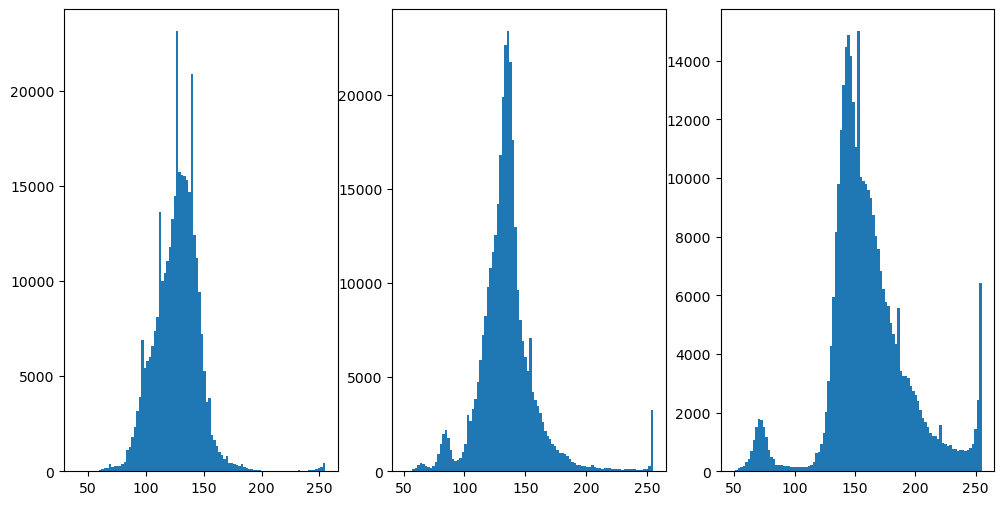

In [60]:
plot_hist(img)

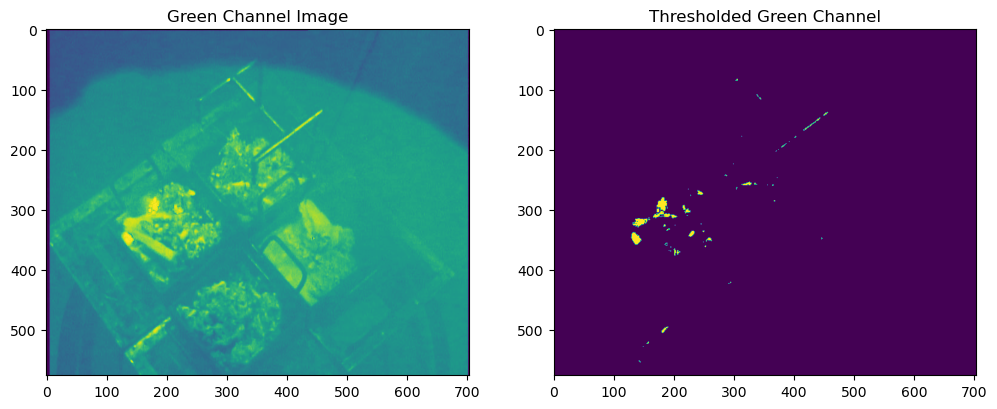

In [71]:
green_img = img[:,:,1]
ret, green_img_th = cv.threshold(green_img, 230, 255, cv.THRESH_BINARY)
plot_images(green_img, green_img_th, 'Green Channel Image', 'Thresholded Green Channel')

In [63]:
green_img.shape

(503, 664)

In [64]:
green_img_th.shape

AttributeError: 'tuple' object has no attribute 'shape'